# PHYS 512 Final Exam - Thomas Vandal
This notebook contains my final solutions to the PHYS 512 final exam. All of the work for the first two problems is in the notebook. The coding of my solutions for problems 3 and 4 was done in the two .py files in this folder, but the final code and results are presented here too for clarity (instead of printing results to text files).

In [1]:
# imports for the whole exam
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# utils for problem 4
import utils as ut

# matplotlib settings (looks nicer)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('figure', figsize=(10, 7))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

## Problem 1

### Part (a)
We have 3 dimensions of $m$ cells each, so we end up with a cubic grid with $m^3$ total cells.

### Part (b)
As we saw in class, for $N$ data points, an FFT scales as $\mathcal{O}(N\log{N})$. In the 3-D case, each dimension has $m$ cells for a total number of $m^3$ cells. Along each dimension of length $m$, we have $m^3/m$ transforms to take (for the other two dimensions), which gives us the equation
$$
3 m^2 \mathcal{O}(m\log{m}) = \mathcal{O}(3 m^3 \log{m}) = \mathcal{O}(m^3\log{m^3}),
$$
as we could expect intuitively for a set of $m^3$ cells. In this case, since we work with a cubic grid it looks like we could just drop the 3 in front, but I will keep it to stay consistent with a case where all dimensions have arbitrary dimension sizes. From the number of operations above, assuming each one takes about a time $a$, we have a run time $T_{FT} \sim a \left[m^3\log{m^3}\right]$.

### Part (c)
As we saw in class, for each particle we compute the force for all other particles so we end up with $\mathcal{O}(n^2)$ for $n$ particles. If these operations took a time $b$ each, we would have $T_{P} \sim b n^2$.

### Part (d)
Given the scalings from (b) and (c), we have our critical value when
$$
a m^3\log{m^3} = b n^2 \Rightarrow 3 a m^3 \log{m} = b n^2.
$$
If we treat $\log{m}$ as a constant, we have our critical value after which the mesh solver is slower is at
$$
m = \left(\frac{b}{3 a C}\right)^{1/3} n^{2/3}, \text{where} C=\log{m}.
$$
This could be further simplified by cancelling $a$ and $b$ if the have similar magnitudes, or by simply neglecting the constant factor and righting $m \sim n^{2/3}$, but the exact equation with $a$, $b$ determined experimentally and a fixed point solver are probably better in practice.

### Part (e)
To answer this part, we can use the equation from (d) to write that when
$$
\frac{n}{m} \geq \left(\frac{b}{3 a C}\right)^{1/3} n^{1/3} \sim n^{1/3},
$$
where I used the approximations described in (d) to get the last approximation (but again, it is preferable to keep the constants). This means that when $m$ gets too large compared to $n$, the FT method gets very expensive compared to the particle interations method because of the $m^3$ dependence and it is therefore preferable to choose the FT method only when there are many particles per grid, as described by the ineqation above.

## Problem 2
In the following, to proove what is asked for, we will use the substitution $\rho(t,x) = e^{ikx}$ to plug a complex exponential and test the equation. This neglects the time dependence of $\rho$ but should not affect the result because we only consider spatial steps on the RHS so we would observe to variation in the time-dependent part (it could be factored out or cancelled).

### Part (a)
By plugging a complex exponential, we have
$$
\rho(t+\delta t, x) = \rho(t,x) - u \delta t \frac{\rho(t,x+\delta x) - \rho(t,x-\delta x)}{2\delta x},
$$
$$
\rho(t+\delta t, x) = e^{ikx} - u \delta t \frac{e^{ik(x+\delta x)} - e^{ik(x-\delta x)}}{2\delta x},
$$
$$
\rho(t+\delta t, x) = e^{ikx}\left[1 - \frac{u \delta t}{\delta x}\frac{e^{ik(x+\delta x)} - e^{ik(x-\delta x)}}{2}\right],
$$
$$
\rho(t+\delta t, x) = e^{ikx}\left[1 - \frac{u \delta t}{\delta x}i\sin{(k\delta{x})}\right].
$$
As we saw in class, the CFL condition for stability is that the magnitude of term in square brackets above needs to be less than unity. However, the magnitude is
$$
\sqrt{1 + \left(\frac{u \delta t}{\delta x}\right)^2\sin^2{(k\delta x)}} > 1,
$$
since the right term in the square root is always nonzero for a positive constant times $\sin{(k\delta x)}$ where $\delta x$ is small and greater than 0. Therefore, CFL condition is broken and the scheme is always numerically unstable.

### Part (b)
A similar manipulation for the *Lax* version gives
$$
\rho(t+\delta t, x) = \frac{\rho(t,x+\delta x) + \rho(t,x-\delta x)}{2} - u \delta t \frac{\rho(t,x+\delta x) - \rho(t,x-\delta x)}{2\delta x},
$$
$$
\rho(t+\delta t, x) = \frac{e^{ik(x+\delta x)} + e^{ik(x-\delta x)}}{2} - u \delta t \frac{e^{ik(x+\delta x)} - e^{ik(x-\delta x)}}{2\delta x},
$$
$$
\rho(t+\delta t, x) = e^{ikx}\left[\frac{e^{ik\delta x} + e^{-ik\delta x}}{2} - u \delta t \frac{e^{ik\delta x} - e^{-ik\delta x}}{2\delta x}\right],
$$
$$
\rho(t+\delta t, x) = e^{ikx}\left[\cos{(k\delta x)} - i \frac{u \delta t}{\delta x}\sin{(k\delta x)}\right].
$$
We can then solve for when the magnitude of the quantity in square brackets is less than or equal to unity (taking square on both sides first):
$$
\cos^2{(k\delta x)} + \left(\frac{u \delta t}{\delta x}\right)^2\sin^2{(k\delta x)} \leq 1,
$$
$$
\left(\frac{u \delta t}{\delta x}\right)^2\sin^2{(k\delta x)} \leq 1 - \cos^2{(k\delta x)},
$$
$$
\left(\frac{u \delta t}{\delta x}\right)^2\sin^2{(k\delta x)} \leq \sin^2{(k\delta x)},
$$
$$
\left(\frac{u \delta t}{\delta x}\right)^2 \leq 1,
$$
$$
\frac{u \delta t}{\delta x} \leq 1 \Leftrightarrow \delta x \geq u\delta t,
$$
where both conditions on the last line are equivalent, and denote when the *Lax* scheme will be stable according to CFL condition.

## Problem 3

### Part (a)
We first find the integral of $x^k$ with respect to $x$ in the region where $-1 \leq x \leq 1$ and express it as a function of $k$ that we denote $a_k$. This results in
$$
a_k = \int_{-1}^{1} x^k dx = \frac{1 - (-1)^{1+k}}{1+k} = \frac{1 + (-1)^{k}}{1+k},
$$
which is nonzero when $k$ is even and zero when $k$ is odd. For this reason, in general, we will select $n$ to be odd since as $k$ goes from $0$ to $n-1$, we want it to be odd so that our higher order polynomial is nonzero, otherwise we would have $k = n-2$ as our higest nonzero order and we might not reach desired precision.

### Part (b)
As we saw in class, we want to sove for $m$ the equation
$$
A^{\text{T}} N^{-1} A m = A^{\text{T}} N^{-1} d,
$$
where $A$ is the polynomial model matrix, $N$ is the noise matrix, $m$ is the least squares solution and $d$ is the data. We can right-multiply by $\left(A^{\text{T}}\right)^{-1}$, then by $N$, and then by $A^{-1}$ to obtain
$$
m = A^{-1} d
$$

### Part (c)
To obtain the weights, we simply use associativity of matrix product to rewrite the equation as
$$
\text{Area} = \left(a^{\text{T}} A^{-1}\right) d = w^{\text{T}} d = \sum_{i=0}^{n-1} w_i d_i,
$$
where $w$ is the weight vector and $n$ is the integration order.

Below, we implement a function **get_coeffs** that computes the coefficients for given orders, a function **get_weights** that calculates the weights with $w = a^{\text{T}} A^{-1}$, and a function **integ** that calculates the area. The "verbose" argument makes the integrator print the coefficients, their sum, and the area. The norm argument is an addition made for part (d) and should be ignored for now.

In [2]:
def get_coeffs(k):

    ak = (1 + (-1)**k) / (1 + k)

    return ak


def get_weights(x, n, norm=False):
    # setup matrices
    x = x.copy()
    A = np.repeat([x], n, axis=0).T
    pows = np.arange(n)
    A = np.power(A, pows)
    a = get_coeffs(pows)
    Ainv = np.linalg.pinv(A)

    w = np.dot(a.T, Ainv)

    # if normalized weights: times total range divide by sum
    if norm:
        return (x.max()-x.min()) * w / np.sum(w)

    return w


def integ(x, y, npow, norm=False, verbose=True):
    # we rescale the weights to the interval, because our previous value
    w = get_weights(x, npow, norm=norm)
    area = np.dot(w, y)
    if verbose:
        np.set_printoptions(precision=4)
        print('Integration weights: {}'.format(w))
        np.set_printoptions(precision=8)  # reset after print
        print('Sum of weights: {:.4f}'.format(np.sum(w)))
        print('Area under the curve is: {:.4f}'.format(area))

    return area


# Test for flat data
# Create 'data'
npts = 9
xmin, xmax = -1.0, 1.0
x = np.linspace(xmin, xmax, num=npts)
y = np.ones(x.shape, dtype=float)

# Use same number of powers as pts for now.
totarea = integ(x, y, 9, verbose=True)

Integration weights: [ 0.0698  0.4154 -0.0655  0.7405 -0.3203  0.7405 -0.0655  0.4154  0.0698]
Sum of weights: 2.0000
Area under the curve is: 2.0000


As we see above, the sum of weights and the area both equal 2 as expected.

### Part (d)
The weights are normalized by setting the norm argument to "True" in the functions defined above. This causes the **get_weights** method to rescale the weigths by the interval width divided by their sum, such that they are normalized over the interval. To verify, we calculate the weights for the 3rd and 5th order cases, factoring out dx and observing that the resulting values are those that we expected according to the problem.

In [3]:
# Still use same number of powers as pts for now
# 3rd order
npts = 3
xmin, xmax = -1.0, 1.0
dx = (x.max()-x.min()) / (npts-1)
x = np.linspace(xmin, xmax, num=npts)
y = np.ones(x.shape, dtype=float)
print('3rd order (dx factored out):', get_weights(x, npts, norm=True)/dx)


# 5th order
npts = 5
xmin, xmax = -1.0, 1.0
dx = (x.max()-x.min()) / (npts-1)
x = np.linspace(xmin, xmax, num=npts)
y = np.ones(x.shape, dtype=float)
print('5th order (dx factored out):', get_weights(x, npts, norm=True)/dx)

3rd order (dx factored out): [0.33333333 1.33333333 0.33333333]
5th order (dx factored out): [0.31111111 1.42222222 0.53333333 1.42222222 0.31111111]


### Part (e)
Using our normalized integrator, we integrate $e^{x}$ from on the interval $-1 \leq x \leq 1$. We use a simple function, **get_npts** to find a number of points that suits the desired order of integration. We test orders $n = 3, 5, 7, 9$, and we compute the analytic integral ($e^x$ again) to obtain an analytic errors. As expected, we see the error going down as we improve the order of integration.

In [4]:
def get_npts(npow):
    """
    Ensure that the number of points is of the form npts = n + (n-1)*j, and
    as close as possible to 30
    """
    j = (30 - npow) / (npow - 1)
    npts = npow + np.round(j) * (npow-1)
    return int(npts)


for n in [3, 5, 7, 9]:
    print('FOR n={}'.format(n))
    xmin, xmax = -1.0, 1.0
    npts = get_npts(n)
    x = np.linspace(xmin, xmax, num=npts)
    y = np.exp(x)
    area = integ(x, y, n, norm=True)
    expec = np.exp(1)-np.exp(-1)
    print('Error and Expected value:', area-expec, expec)
    print()


FOR n=3
Integration weights: [0.0554 0.0572 0.0589 0.0605 0.0619 0.0633 0.0645 0.0655 0.0665 0.0673
 0.068  0.0686 0.069  0.0693 0.0695 0.0696 0.0695 0.0693 0.069  0.0686
 0.068  0.0673 0.0665 0.0655 0.0645 0.0633 0.0619 0.0605 0.0589 0.0572
 0.0554]
Sum of weights: 2.0000
Area under the curve is: 2.3510
Error and Expected value: 0.0006165112568616848 2.3504023872876028

FOR n=5
Integration weights: [0.0459 0.0572 0.0653 0.0707 0.074  0.0757 0.076  0.0755 0.0743 0.0729
 0.0714 0.07   0.0689 0.0682 0.068  0.0682 0.0689 0.07   0.0714 0.0729
 0.0743 0.0755 0.076  0.0757 0.074  0.0707 0.0653 0.0572 0.0459]
Sum of weights: 2.0000
Area under the curve is: 2.3504
Error and Expected value: 5.535691192104508e-06 2.3504023872876028

FOR n=7
Integration weights: [0.0343 0.0572 0.0683 0.0721 0.0717 0.0694 0.0667 0.0646 0.0635 0.0634
 0.0641 0.0654 0.0669 0.0683 0.0693 0.0696 0.0693 0.0683 0.0669 0.0654
 0.0641 0.0634 0.0635 0.0646 0.0667 0.0694 0.0717 0.0721 0.0683 0.0572
 0.0343]
Sum of weights: 

## Problem 4
We will use matched filtering to find an initial guess for the width and the peak center. Then we will use Newton's method to find the best fit parameters and their errors.

First, let's define a Lorentzian and plot an initial guess on the data.

There are 16000 data poins with mean 0.0046 and RMS 0.3026


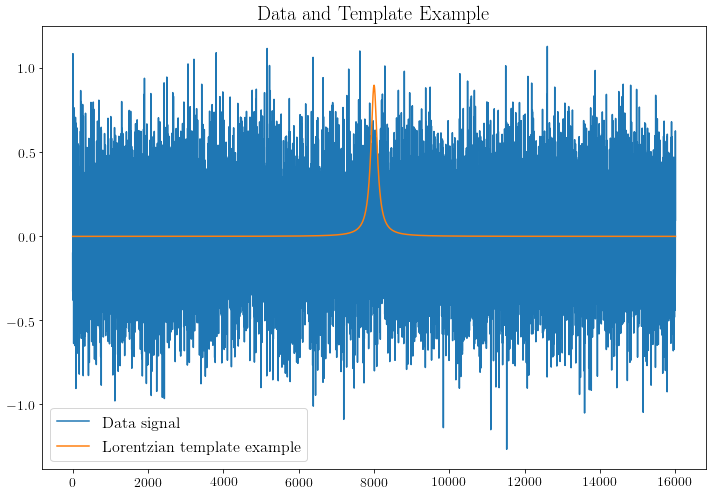

In [5]:
def lorentz(x, p):
    """Lorentz function
    Args:
        x  (array): values where we evaluate the function
        p (array): parameters
          - x0 (float): center
          - a  (float): amplitude
          - w  (float): width
    Returns:
        lo (array): simplified Lorentz functino at x
    """

    return p[0] / (((x-p[1])/p[2])**2 + 1)


def grad_lorentz(x, p):
    # parameter gradient for newton in b
    g = np.zeros([len(x), len(p)])

    g[:, 0] = 1 / (((x-p[1])/p[2])**2 + 1)
    g[:, 1] = 2*p[0]*p[2]**2*(x-p[1]) / (x**2 - 2*x*p[1] + p[2]**2+p[1]**2)**2
    g[:, 2] = 2*p[0]*p[2]*(x-p[1])**2 / (p[1]**2 - 2*x*p[1] + p[2]**2+x**2)**2

    return g

# load data and define x
y = np.loadtxt('./lorentz_data.txt')
x = np.arange(y.size)
print('There are {} data poins with mean {:.4f} and RMS {:.4f}'.format(
                                                                y.size,
                                                                np.mean(y),
                                                                np.std(y)))

# define lorentzian initial guess values
aguess = 0.9  # 3 times RMS of data, will optimize later
x0 = np.mean(x)
wi = 100  # random, we'll loop anyway
plt.plot(x, y, label='Data signal')
plt.plot(x, lorentz(x, [aguess, x0, wi]), label='Lorentzian template example')
plt.title('Data and Template Example', fontsize=20)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

We see that there is a lot of noise... Matched filter will be useful.

### Part (a)
We performed match filtering for all the widths in specified range. We use a smoothenned power spectrum with a Gaussian filter, and we use a basic cosine window function from scipy. We then perform the matched filtering for each width and we store them to then find the one with the highest amplitude. Filtering utility functions are implemented in **utils.py**. The max amplitudes and $x_0$'s are reported on plots instead of prints since we iterate a lot of values, but they are stored in "amplitudes.txt" and "centers.txt" for reference.

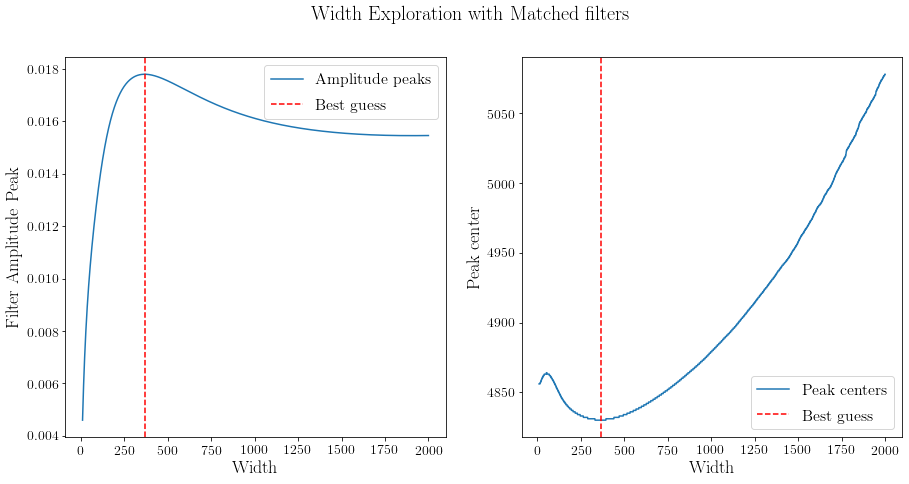

In [6]:
# get white noise model: smoothed power spectrum
window = windows.cosine(y.size)
powers = ut.powerspec(y, window=window, smooth_sig=1)

# loop through templates with different widths
wvals = np.arange(10, 2000+1)
apeak = np.zeros(wvals.size)
x0peak = np.zeros(wvals.size)
for i in range(wvals.size):
    # generate template
    templ = lorentz(x, [aguess, x0, wvals[i]])

    # matched filter
    mf = ut.matchedfilt(y, templ, powers, window=window)

    # append stuff
    apeak[i] = np.max(mf)
    x0peak[i] = x[np.argmax(mf)]  # x are indices, but in case they change...

# save exploration values
np.savetxt('./amplitudes.txt', apeak)
np.savetxt('./centers.txt', x0peak)

# best guesses
imax = np.argmax(apeak)
wguess = wvals[imax]
x0guess = x0peak[imax]

# plot exploration result
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(wvals, apeak, label='Amplitude peaks')
axs[0].axvline(wguess, linestyle='--', color='r', label='Best guess')
axs[0].set_xlabel('Width', fontsize=18)
axs[0].set_ylabel('Filter Amplitude Peak', fontsize=18)
axs[0].legend(fontsize=16)

axs[1].plot(wvals, x0peak, label='Peak centers')
axs[1].axvline(wguess, linestyle='--', color='r', label='Best guess')
axs[1].set_xlabel('Width', fontsize=18)
axs[1].set_ylabel('Peak center', fontsize=18)
axs[1].legend(fontsize=16)
fig.suptitle('Width Exploration with Matched filters', fontsize=20)
plt.show()

### Part (b)
Once we have a guess from our matched filter output, we can use Newton's method to find the best fit parameter. The Newton's method implementation is in the **utils.py** file. As we see below, the solver quickly converge to values with a very small uncertainty.

Strating Guess: a=0.9, x0=4830.0, w=367
The Newton Method converged after 8 iterations
Best-fit parameters: [1.43537995e-01 4.82453064e+03 1.19906006e+02]
Parameter errors: [7.27356926e-04 1.07838680e+00 7.83859490e-01]


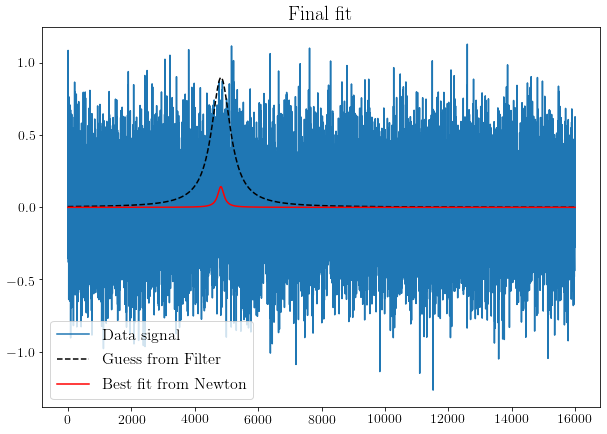

In [7]:
# guess from matched filter
print('Strating Guess: a={}, x0={}, w={}'.format(aguess, x0guess, wguess))

pguess = np.array([aguess, x0guess, wguess])

# note: use identity noise matrix, should be reasonable since noise is gaussian and amplitude is about 1.
p, pcov = ut.newton(lorentz, grad_lorentz, x, y, pguess, maxit=10,
                    cstol=1e-3, dptol=1e-3)
print('Best-fit parameters: {}'.format(p))
print('Parameter errors: {}'.format(np.sqrt(np.diag(pcov))))

# plot final result
plt.plot(x, y, label='Data signal')
plt.plot(x, lorentz(x, pguess), 'k--', label='Guess from Filter')
plt.plot(x, lorentz(x, p), 'r-', label='Best fit from Newton')
plt.title('Final fit', fontsize=20)
plt.legend(fontsize=16)
plt.show()